# Convolutional networks
## Network 1

Construct a convolutional neural network consisting of one convolution layer with 20 feature maps followed by a max-pooling and one fully-connected layer. The precise layout is as follows:

$\bullet$ imageInputLayer

$\bullet$ convolution2dLayer with padding = 1, stride = 1, receptive field of 5$\times$5, and 20 feature maps (followed by reluLayer)

$\bullet$ maxPooling2dLayer with padding = 0, stride = 2, pool-size of 2$\times$2

$\bullet$ fullyConnectedLayer of 50 neurons (followed by reluLayer)

$\bullet$ fullyConnectedLayer of 10 neurons followed by softmaxLayer and classificationLayer
Train the network using stochastic gradient descent with Momentum = 0.9 for at most 120 epochs with MiniBatchSize = 8192 and InitialLearningRate = 0.001. For early stopping use ValidationPatience = 3 and ValidationFrequency = 30. Shuffle the training set before each epoch. Calculate the classification errors obtained on the training, validation, and test sets separately. The training time should be at most a few hours on one CPU. 

## Load data

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()




Using TensorFlow backend.


In [8]:

#Network 1
batch_size = 8192
num_classes = 10
epochs = 120
initial_learning_rate = 0.001
momentum = 0.9
model_name = 'keras_cifar10_trained_model.h5'
input_shape = x_train.shape[1:]

# Normalize data.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

seed = 6
np.random.seed(seed)

model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same",strides=1, activation="relu",input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding="valid"))
model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(lr = 0.001, decay=0, momentum=0.9, nesterov=False)


#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 20)        1520      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                256050    
_________________________________________________________________
activation_5 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_6 (Activation)    (None, 10)               

In [9]:
#Make a callback for early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3,restore_best_weights=True)
#mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0)
#Fit the model
model = model.fit(x_train,y_train,batch_size=batch_size, epochs = epochs, validation_data=(x_test,y_test),shuffle=True, callbacks=[es], verbose=1, validation_freq=30)


Train on 50000 samples, validate on 10000 samples
Epoch 1/120
50000/50000 [==============================] - 15s 309us/step - loss: 2.3197 - categorical_accuracy: 0.0959
Epoch 2/120


/home/edin/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,categorical_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 15s 294us/step - loss: 2.3075 - categorical_accuracy: 0.1105
Epoch 3/120
50000/50000 [==============================] - 15s 302us/step - loss: 2.2984 - categorical_accuracy: 0.1261
Epoch 4/120
50000/50000 [==============================] - 15s 302us/step - loss: 2.2935 - categorical_accuracy: 0.1396
Epoch 5/120
50000/50000 [==============================] - 16s 310us/step - loss: 2.2897 - categorical_accuracy: 0.1472
Epoch 6/120
50000/50000 [==============================] - 15s 302us/step - loss: 2.2859 - categorical_accuracy: 0.1533
Epoch 7/120
50000/50000 [==============================] - 15s 301us/step - loss: 2.2818 - categorical_accuracy: 0.1596
Epoch 8/120
50000/50000 [==============================] - 15s 301us/step - loss: 2.2775 - categorical_accuracy: 0.1666
Epoch 9/120
50000/50000 [==============================] - 15s 302us/step - loss: 2.2731 - categorical_accuracy: 0.1744
Epoch 10/120
50000/50000 [==========================

Epoch 69/120
50000/50000 [==============================] - 16s 322us/step - loss: 1.8581 - categorical_accuracy: 0.3569
Epoch 70/120
50000/50000 [==============================] - 16s 320us/step - loss: 1.8548 - categorical_accuracy: 0.3568
Epoch 71/120
50000/50000 [==============================] - 16s 320us/step - loss: 1.8518 - categorical_accuracy: 0.3577
Epoch 72/120
50000/50000 [==============================] - 16s 319us/step - loss: 1.8485 - categorical_accuracy: 0.3573
Epoch 73/120
50000/50000 [==============================] - 16s 318us/step - loss: 1.8455 - categorical_accuracy: 0.3607
Epoch 74/120
50000/50000 [==============================] - 16s 322us/step - loss: 1.8419 - categorical_accuracy: 0.3621
Epoch 75/120
50000/50000 [==============================] - 16s 318us/step - loss: 1.8387 - categorical_accuracy: 0.3629
Epoch 76/120
50000/50000 [==============================] - 16s 318us/step - loss: 1.8359 - categorical_accuracy: 0.3622
Epoch 77/120
50000/50000 [======

## Plot the results

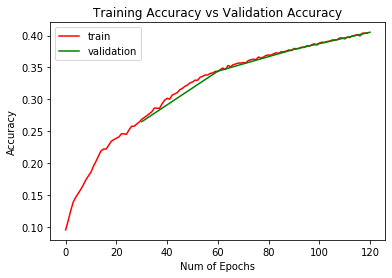

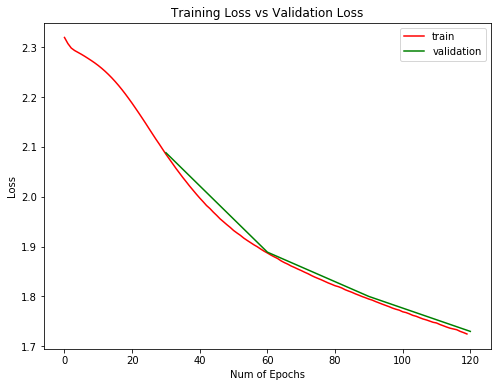

In [10]:
plt.figure(0)
plt.plot(model.history['categorical_accuracy'],'r')
m_accuracy =  model.history['val_categorical_accuracy']

plt.plot(np.arange(len(m_accuracy))*30+30,m_accuracy,'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(model.history['loss'],'r')
m_loss =  model.history['val_loss']
plt.plot(np.arange(len(m_loss))*30+30,m_loss,'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()


## Network 2
Network 2 is a deeper convolutional network than Network 1. It consists of three convolution layers with 20, 30, 50 feature maps, respectively. The precise layout is as follows:

$\bullet$ imageInputLayer

$\bullet$ convolution2dLayer with padding = 1, stride = 1, receptive field of area 3$\times$3, and 20 feature maps (followed by batchNormalizationLayer and reluLayer)

$\bullet$ maxPooling2dLayer with padding = 0, stride = 2, pool size of 2$\times$2

$\bullet$ convolution2dLayer with padding = 1, stride = 1, receptive field of area 3$\times$3, and 30 feature maps (followed by batchNormalizationLayer and reluLayer)

$\bullet$ maxPooling2dLayer with padding = 0, stride = 2, pool size of 2$\times$2

$\bullet$ convolution2dLayer with padding = 1, stride = 1, receptive field of area 3$\times$3, and 50 feature maps (followed by batchNormalizationLayer and reluLayer)

$\bullet$ fullyConnectedLayer of 10 neurons followed by softmaxLayer and classificationLayer
Train the network for at most 120 epochs with Momentum = 0.9, MiniBatchSize = 8192 and InitialLearningRate = 0.001. For early stopping use ValidationPatience = 3 and ValidationFrequency = 30. Shuffle the training set before each epoch. Calculate the classification errors obtained on the training, validation, and test sets separately. The training time is expected to be several hours. 

In [2]:

#Network 2
batch_size = 8192
num_classes = 10
epochs = 120
initial_learning_rate = 0.001
momentum = 0.9
model_name = 'keras_cifar10_trained_model.h5'
input_shape = x_train.shape[1:]

# Normalize data.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

seed = 6
np.random.seed(seed)

model = Sequential()
model.add(Conv2D(20, (3, 3), padding="same",strides=1,input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding="valid"))
model.add(Conv2D(30, (3, 3), padding="same",strides=1,input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding="valid"))
model.add(Conv2D(50, (3, 3), padding="same",strides=1,input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(lr = 0.001, decay=0, momentum=0.9, nesterov=False)


#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 20)        80        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 30)        5430      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 30)        120       
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 30)      

In [3]:
#Make a callback for early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3,restore_best_weights=True)
#mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0)
#Fit the model
model = model.fit(x_train,y_train,batch_size=batch_size, epochs = epochs, validation_data=(x_test,y_test),shuffle=True, callbacks=[es], verbose=1, validation_freq=30)



Train on 50000 samples, validate on 10000 samples
Epoch 1/120
50000/50000 [==============================] - 142s 3ms/step - loss: 2.5058 - categorical_accuracy: 0.1047
Epoch 2/120


/home/edin/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,categorical_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 105s 2ms/step - loss: 2.3321 - categorical_accuracy: 0.1594
Epoch 3/120
50000/50000 [==============================] - 104s 2ms/step - loss: 2.1558 - categorical_accuracy: 0.2257
Epoch 4/120
50000/50000 [==============================] - 105s 2ms/step - loss: 2.0386 - categorical_accuracy: 0.2728
Epoch 5/120
32768/50000 [==================>...........] - ETA: 40s - loss: 1.9620 - categorical_accuracy: 0.3036

KeyboardInterrupt: 

# Conclusion
You can see in the graphs that the addition of complexity from network 2 compared to
network 1 resulted in a significant increase of classification performance. This did not
have any effect on overfitting, since both networks learned for the whole 120 epochs.
It came with a trade off though, since the training time of network 2 is significantly longer than network 1.